<a href="https://colab.research.google.com/github/osavelyev/sber/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B%2C_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **План**

- Линейные методы. Определение и постановка задачи линейной регрессии. *Lp*  норма

- Ridge и Lasso регрессия. *Lp*  регуляризация

- Рекомендованная литература

ссылка на ноутбук в колаб: https://drive.google.com/file/d/1au2UdCsZKCHwYEKvdH95AQig_g4B9izr/view?usp=sharing

# Линейные методы. Регрессия.

Матричные производные:

http://www.machinelearning.ru/wiki/images/archive/9/93/20170127140036!MO17_seminar3.pdf

Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b $$,
где у - целевая переменная (что мы хотим предсказать), $x_i$ -- признак объекта х, $w_i$ -- вес i-го признака, b -- bias (смещение, свободный член)

Часто предполагают, что объект х содержит в себе фиктивный признак, который всегда равен 1, тогда bias это есть вес этого признака. В этом случае формула принимает простой вид:
$$ y = <w, x> $$,
где $<\cdot, \cdot>$ -- скалярное произведение векторов.

В матричной форме, в случае, когда у нас есть n объектов формулу можно переписать следующим образом:
$$ y = Xw $$,
y -- вектор размера n, X -- матрица объекты-признаки размера $n \times k$, w -- вектор весов размера k.

Решение по методу наименьших квадратов дает 
$$ w = (X^TX)^{-1}X^Ty $$

**Определение (Lp-норма):**

$$
    \|\cdot\|_{p}: \mathbb{R}^{d} \to \mathbb{R}\\
    \forall p \geq 1: \forall x \in \mathbb{R}^{d}: \|x\|_{p} = \sqrt[p]{\sum_{i=1}^{n} x_{i}^{p}}
$$

**Доказательство**

Вспомним, как выглядит задача оптимизации:

$$
    \frac{1}{n} \sum_{i=1}^{n} (y_i - \langle x_i, w \rangle)^2 \to \min\limits_{w}
$$

Эта задача оптимизации допускает следующую более удобную запись:

$$
    \frac{1}{n} \| Xw - y \|_{2}^{2} \to \min\limits_{w}
$$

Утверждается, что:

$$
    \frac{1}{n} \| Xw - y \|_{2}^{2} = \frac{1}{n} (Xw - y)^{\top} (Xw - y)
$$

(потому что $\| x \|_{2}^{2} = \langle x, x\rangle$)

Раскроем это выражение:

$$
\begin{align*}
    & (Xw - y)^{\top} (Xw - y) =\\
    &= (w^{\top} X^{\top} - y^{\top}) (Xw - y) =\\
    &= (w^{\top} X^{\top} X w - w^{\top} X^{\top} y) - (y^{\top} X w - y^{\top} y) =\\
    &= w^{\top} X^{\top} X w - 2 y^{\top} X w + y^{\top} y
\end{align*}
$$

Найдём градиент этой функции, т.е. все частные производные по весам (т.е. по $w_1, \ldots, w_d$).

$$
\begin{align*}
    &\frac{\partial}{\partial w} (w^{\top} X^{\top} X w - 2 y^{\top} X w + y^{\top} y) =\\
    &= 2 X^{\top} X w - 2 X^{\top} y = 0
\end{align*}
$$

Отсюда получаем итоговый ответ:

$$
\begin{align*}
    X^{\top} X w &= X^{\top} y\\
    w &= (X^{\top} X)^{-1} X^{\top} y
\end{align*}
$$

Полезная статья про решение Линейной регрессии: https://habr.com/ru/post/474602/

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Сгенерируем рандомный набор точек
X = np.linspace(-5, 5, 100)
y = 10 * X - 7


X_train = X[0::2].reshape(-1, 1)
y_train = y[0::2] + np.random.randn(50) * 10 

X_test = X[1::2].reshape(-1, 1)
y_test = y[1::2] + np.random.randn(50) * 10

In [3]:
X_train[1], y_train[1]

(array([-4.7979798]), -64.85908236516198)

In [4]:
def fit(X, y):
    n, k = X.shape
    X = np.hstack((X, np.ones((n, 1))))
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

def predict(X, w):
    n, k = X.shape
    X = np.hstack((X, np.ones((n, 1))))
    y_pred = X @ w
    return y_pred

weights = fit(X_train, y_train)
weights

array([10.68277515, -5.81481373])

In [ ]:
y_hat = predict(X_test, weights)

(array([16.,  2.,  5.,  5.,  2.,  5.,  6.,  3.,  0.,  2.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([2.15956345e-01, 2.28962630e+01, 4.55765697e+01, 6.82568764e+01,
        9.09371831e+01, 1.13617490e+02, 1.36297797e+02, 1.58978103e+02,
        1.81658410e+02, 2.04338717e+02, 2.27019023e+02, 2.49699330e+02,
        2.72379637e+02, 2.95059943e+02, 3.17740250e+02, 3.40420557e+02,
        3.63100863e+02, 3.85781170e+02, 4.08461477e+02, 4.31141784e+02,
        4.53822090e+02]),
 <a list of 20 Patch objects>)

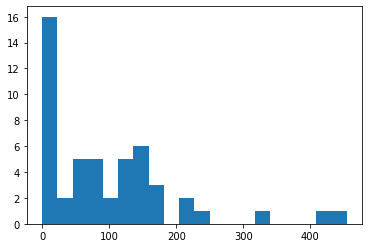

In [ ]:
plt.hist((y_test - y_hat)**2, bins = 20)

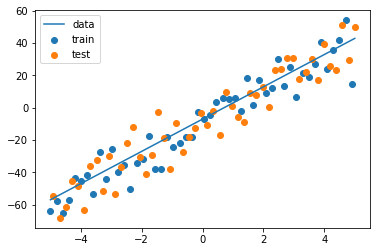

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, label = 'data')
plt.scatter(X_train, y_train, label ='train')
plt.scatter(X_test, y_test, label ='test')
plt.legend()
plt.show()

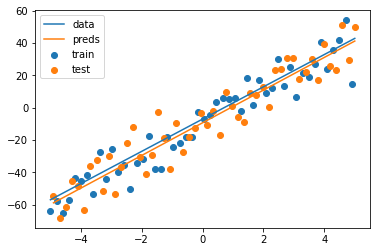

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, label = 'data')
plt.scatter(X_train, y_train, label ='train')
plt.scatter(X_test, y_test, label ='test')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(weights[:-1]) + weights[-1], label = 'preds')
plt.legend()
plt.show()

**Определение (R2-score или коэффициент детерминации):**

$$ R^2 = 1 - \frac{MSE(y, \widehat{y})}{D y} $$

In [ ]:
from sklearn.metrics import r2_score

train_preds = predict(X_train, weights)
test_preds = predict(X_test, weights)

print('train r2', r2_score(y_train, train_preds))
print('test r2', r2_score(y_test, test_preds))

train r2 0.9179964244553839
test r2 0.8985775336147465


In [ ]:
from sklearn.metrics import mean_squared_error

train_preds = predict(X_train, weights)
test_preds = predict(X_test, weights)

print('train mse', mean_squared_error(y_train, train_preds))
print('test mse', mean_squared_error(y_test, test_preds))

train mse 77.84201506126992
test mse 97.77251242777237


# Ridge и Lasso регрессия. *Lp*  регуляризация

### Ridge&Lasso

На практике точные формулы для подсчета коэффициентов линейной регрессии не используются, а используется метод градиентного спуска который состоит в подсчете производных от ошибки и шагу в направлении наискорейшего убывания функции (напомню, что мы стремимся минимизировать функцию потерь). Эти методы работают быстрее, чем точное вычисление обратных матриц и их перемножение.
Более того, во многих задачах это единственный способ обучить модель, так как не всегда (на самом деле почти никогда) удается выписать точную формулу для минимума сложного функционала ошибки.

Давайте рассмотрим реализации линейных регрессоров в библиотеке sklearn

Но сначала давайте поймём, зачем вообще нужна регуляризация. Рассмотрим проблему мультиколлинеарности. В упрощённом понимании, это означает, что признаки линейно зависимы. Посмотрим, к чему это ведёт.

In [ ]:
X_train

array([[-5.        ],
       [-4.7979798 ],
       [-4.5959596 ],
       [-4.39393939],
       [-4.19191919],
       [-3.98989899],
       [-3.78787879],
       [-3.58585859],
       [-3.38383838],
       [-3.18181818],
       [-2.97979798],
       [-2.77777778],
       [-2.57575758],
       [-2.37373737],
       [-2.17171717],
       [-1.96969697],
       [-1.76767677],
       [-1.56565657],
       [-1.36363636],
       [-1.16161616],
       [-0.95959596],
       [-0.75757576],
       [-0.55555556],
       [-0.35353535],
       [-0.15151515],
       [ 0.05050505],
       [ 0.25252525],
       [ 0.45454545],
       [ 0.65656566],
       [ 0.85858586],
       [ 1.06060606],
       [ 1.26262626],
       [ 1.46464646],
       [ 1.66666667],
       [ 1.86868687],
       [ 2.07070707],
       [ 2.27272727],
       [ 2.47474747],
       [ 2.67676768],
       [ 2.87878788],
       [ 3.08080808],
       [ 3.28282828],
       [ 3.48484848],
       [ 3.68686869],
       [ 3.88888889],
       [ 4

In [ ]:
X_adversary = X_train.copy()
X_adversary[:, 0] = 2
print(X_train.shape, X_adversary.shape)

(50, 1) (50, 1)


In [ ]:
X_adversary

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [ ]:
w_adversary = fit(X_adversary, y_train)
w_adversary

LinAlgError: ignored

**ВОПРОС** Почему так произошло??

In [ ]:
#TODO

**Что произошло**

Ранг матрицы $\mathrm{X_{adversary}}$ равен 1, а размерность признакового пространства равна 2. Из линейной алгебры известно, что ранг произведения матриц не превосходит минимального ранга этих двух матриц: 

$$
    \mathrm{rk} AB \leq \min \{\mathrm{rk} A, \mathrm{rk} B\}
$$

К чему это здесь приводит? Посмотрим на аналитическое решение
$$
    w = (X^{\top} X)^{-1} X^{\top} y
$$

Нас интересует компонента $(X^{\top} X)^{-1}$. Здесь обратная не определена, потому что ранг матрицы $X^{\top} X$ не превосходит единицы. При этом матрица $X^{\top} X$ -- квадратная, размера 2x2. Из линейной алгебры мы знаем, что квадратная матрица обратима только тогда, когда она полноранговая. Именно об этом Вам сигналит ошибка LinAlgError: Вы пытаетесь обратить матрицу, которую обращать нельзя. Что делать?

**Определение ($L_{p}$-регуляризация):**
Пусть задана линейная регрессия с вектором весов $w$ и функцией ошибок $\mathcal{L}(y, \widehat{y}(w))$ (например, среднеквадратичная ошибка), тогда к ней можно добавить $L_{p}$-регуляризацию изменив функционал ошибки следующим образом:

$$
    \mathcal{L}(y, \widehat{y}(w)) + \alpha \|w\|_{p}^{p} \to \min\limits_{w}
$$

Если $p$ равно 2, то это называют **Ridge**-регуляризацией, а если $p$ равно 1, то **Lasso**-регуляризацией.

**Утверждение:** $L_{2}$-регуляризация позволяет избежать этой проблемы ($L_{p}$-нормы для произвольных $p$, на самом деле, тоже, но это уже нетривиально доказывать).

**Определение (напоминание):** Собственные значения матрицы $A$ это такие числа $\lambda$, что существует ненулевой вектор $x$, такой что $Ax = \lambda x$

А как вообще понять, насколько плохо всё с матрицей в плане того, что с ней будет происходить при попытке её обратить?
Посчитать коэффициент обусловленности: отношение максимального собственного значения к минимальному. Чем он больше, тем всё хуже.

In [ ]:
eigenvals, eigenvectors = np.linalg.eig(X.reshape(1,-1).T @ X.reshape(1,-1))
eigenvals.max() / eigenvals.min()

(-3.02413172630763e+16-0j)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
wine_data = load_wine()
wine_data

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [ ]:
X = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])
y = wine_data['target']

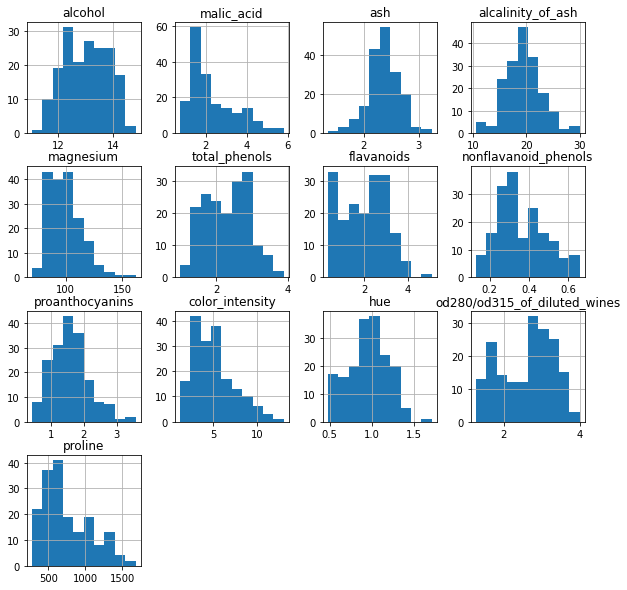

In [ ]:
_ = X.hist(X.columns, figsize=(10, 10))

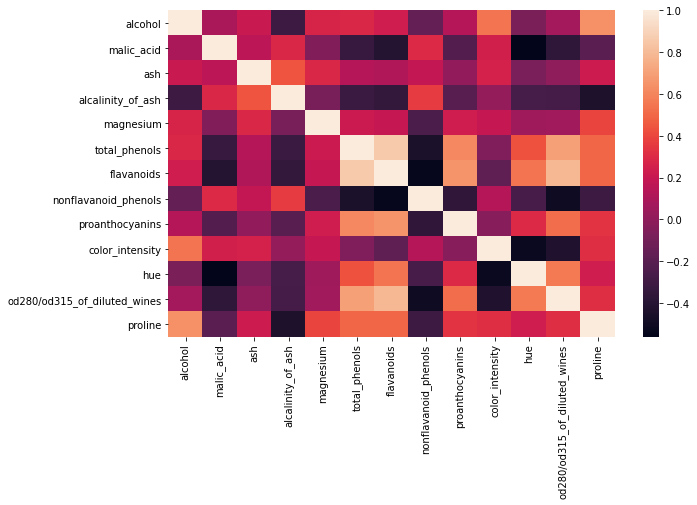

In [ ]:
import seaborn as sns

plt.figure(figsize = (10,6))
sns.heatmap(X.corr())

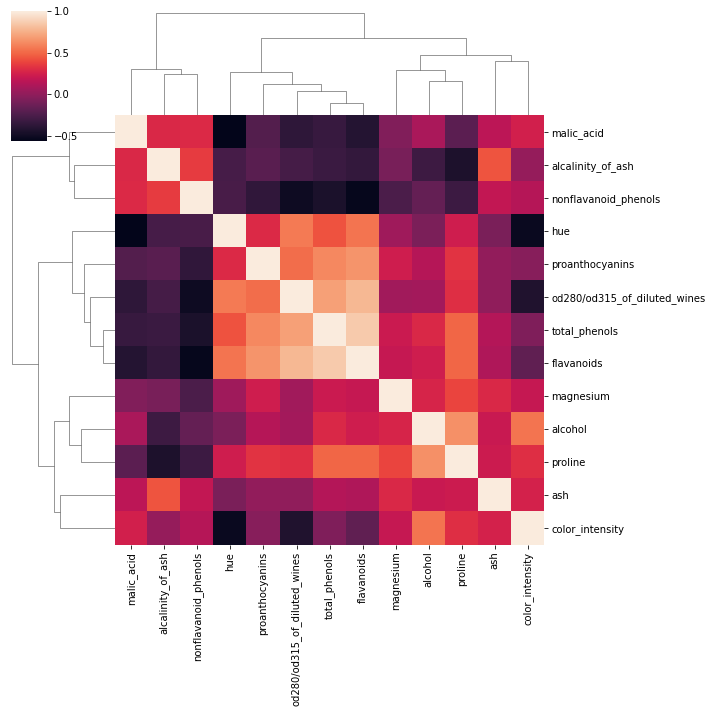

In [ ]:
sns.clustermap(X.corr())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=99
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
test_predictions = regressor.predict(X_test)

print('test mse: ', mean_squared_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))

test mse:  0.07475703133417169
r2 score:  0.8738475096235853


In [ ]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


<BarContainer object of 13 artists>

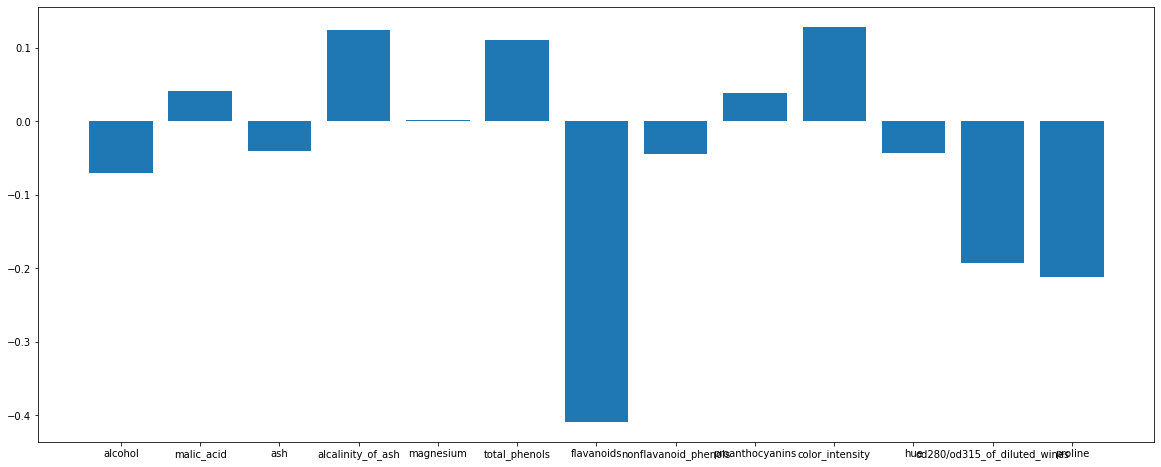

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, regressor.coef_)

Теперь обратимся к методам с регуляризацией.

Ridge (L2-регуляризация) сильно штрафует за слишком большие веса и не очень за малые. При увеличении коэффициента перед регуляризатором веса меняются плавно

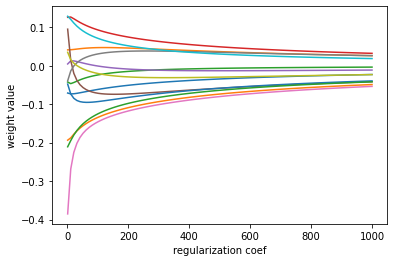

In [ ]:
alphas = np.linspace(1, 1000, 100)

weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    ridge_regressor = Ridge(alpha)
    ridge_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.xlabel('regularization coef')
plt.ylabel('weight value')
plt.show()

Lasso одинаково сильно штрафует малые и большие веса, поэтому при достаточно большом коэффициенте регуляризации многие признаки становятся равными нулю, при этом остаются только наиболее инфромативные. Этот факт можно использовать для решения задачи отбора признаков.

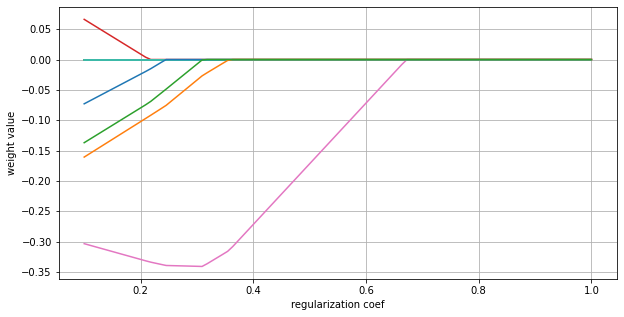

In [ ]:
alphas = np.linspace(0.1, 1, 100)

plt.figure(figsize=(10, 5))
weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    lasso_regressor = Lasso(alpha)
    lasso_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, lasso_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.xlabel('regularization coef')
plt.ylabel('weight value')
plt.grid()
plt.show()

In [ ]:
ridge = Ridge(0.1)
ridge.fit(X_train, y_train)
print('\n r2 score ridge: ', r2_score(y_test, ridge.predict(X_test)))
print('test mse ridge: ', mean_squared_error(y_test, ridge.predict(X_test)))

lasso = Lasso(0.1)
lasso.fit(X_train, y_train)
print('\n r2 score lasso: ', r2_score(y_test, lasso.predict(X_test)))
print('test mse lasso: ', mean_squared_error(y_test, lasso.predict(X_test)))


 r2 score ridge:  0.8740521897249454
test mse ridge:  0.07463573942225457

 r2 score lasso:  0.8096651433986044
test mse lasso:  0.11279102613416034


# Выводы

- Реализовано аналитическое решение задачи линейной регрессии
- Дано определение Lp регуляризации
- Приведено сравнение Ridge и Lasso регуляризаций модели


# Рекомендованная литература

- [Матричные производные](http://www.machinelearning.ru/wiki/images/archive/9/93/20170127140036!MO17_seminar3.pdf)
- [Решение уравнения простой линейной регрессии](https://habr.com/ru/post/474602/)

